In [422]:
import matplotlib.pyplot as plt
from math import atan2

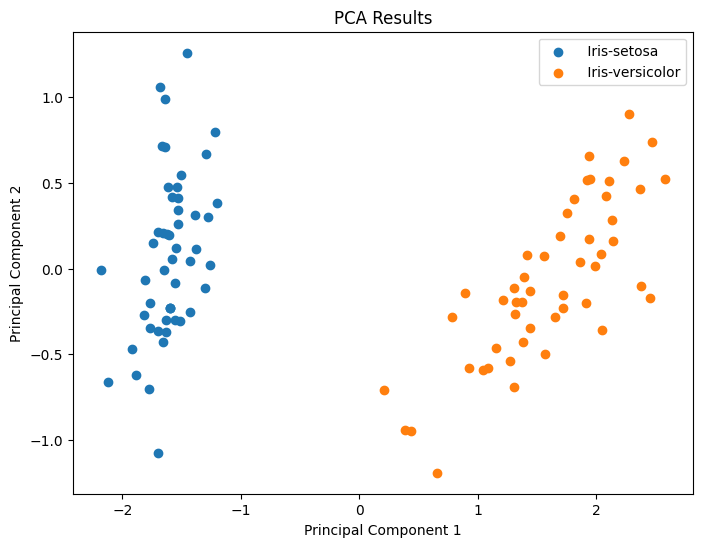

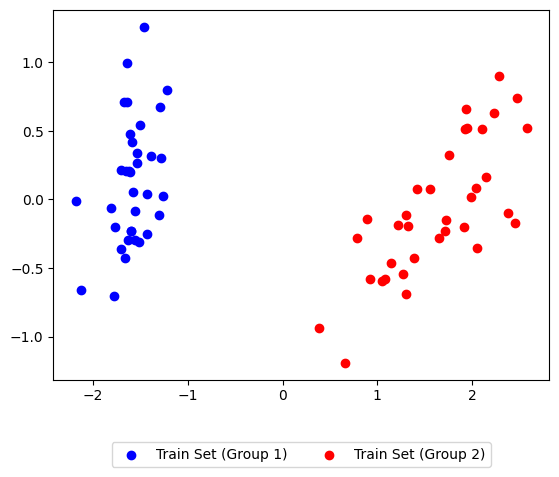

In [423]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

dataset = ('iris.dat')

class Point:
    def __init__(self, coordx, coordy):
        self.x = coordx
        self.y = coordy

class Group:
    def __init__(self):
        self.points_group = []

    def add_point(self, point):
        self.points_group.append(point)

data_points = []

with open(dataset, "r") as file:
    lines = file.readlines()

data_start = lines.index("@data\n") + 1

class_labels = []

# Get Classes lines
for line in lines:
  if line.startswith("@attribute Class"):
    class_attribute_line = line
    break

# Get the first two Classes
start_index = class_attribute_line.find('{') + 1
end_index = class_attribute_line.find('}')
class_values = class_attribute_line[start_index:end_index]
class_values_list = class_values.split(',')

# Add space character to the first Class
#class_values_list[0] = " " + class_values_list[0]
class_values_list = class_values_list[:2]

class_labels = []

for line in lines[data_start:]:
    data = line.strip().split(',')
    class_label = data[-1]

    if class_label in class_values_list:
      data_points.append([float(val) for val in data[:-1]])
      class_name = data[-1]
      class_labels.append(class_name)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_points)

plt.figure(figsize=(8, 6))

unique_classes = set(class_labels)

for class_name in unique_classes:
    indices = [i for i, label in enumerate(class_labels) if label == class_name]
    x = pca_result[indices, 0]
    y = pca_result[indices, 1]
    plt.scatter(x, y, label=class_name)

plt.title("PCA Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

group1 = Group()
group2 = Group()

for i in range(len(pca_result)):
    point = Point(pca_result[i, 0], pca_result[i, 1])
    if class_labels[i] == class_values_list[0]:
        group1.add_point(point)
    else:
        group2.add_point(point)

all_groups = [group1, group2]

train_ratio = 0.7

for group in all_groups:
    train_size = int(train_ratio * len(group.points_group))
    group.train_set = group.points_group[:train_size]
    group.test_set = group.points_group[train_size:]

group1_train_x = [point.x for point in group1.train_set]
group1_train_y = [point.y for point in group1.train_set]
group2_train_x = [point.x for point in group2.train_set]
group2_train_y = [point.y for point in group2.train_set]

plt.scatter(group1_train_x, group1_train_y, color='b', label='Train Set (Group 1)')
plt.scatter(group2_train_x, group2_train_y, color='r', label='Train Set (Group 2)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()


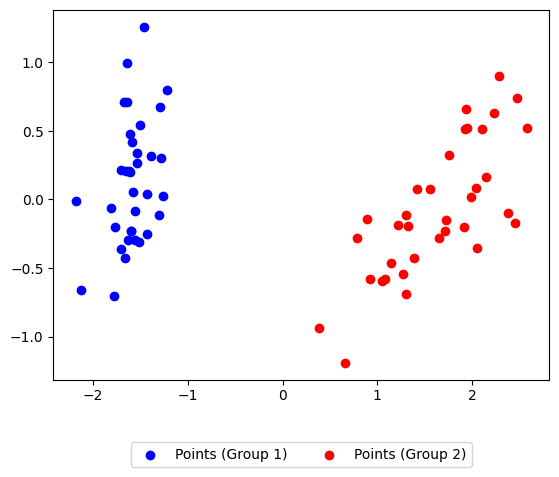

In [424]:
group1_all_points_x = [point.x for point in group1.train_set]
group1_all_points_y = [point.y for point in group1.train_set]
group2_all_points_x = [point.x for point in group2.train_set]
group2_all_points_y = [point.y for point in group2.train_set]
plt.scatter(group1_all_points_x, group1_all_points_y, color='b', label='Points (Group 1)')
plt.scatter(group2_all_points_x, group2_all_points_y, color='r', label='Points (Group 2)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

## Plot feixo convexo do conjunto dos pontos em dois gráficos separados

In [425]:
def orientation(p, q, r):
    """
    Função para verificar a orientação dos pontos (p, q, r).
    Retorna os seguintes valores:
    -1 se estão no sentido horário.
    0 se são colineares.
    1 se estão no sentido anti-horário.
    """
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0
    return 1 if val > 0 else -1

def graham_scan(points):
    n = len(points)
    if n < 3:
        return []

    # Encontre o ponto com a menor coordenada y (e à esquerda, se houver um empate)
    min_point = min(points, key=lambda point: (point.y, point.x))

    # Classifique os pontos com base em suas polaridades em relação ao ponto mínimo
    sorted_points = sorted(points, key=lambda point: (atan2(point.y - min_point.y, point.x - min_point.x), point.x, point.y))

    # Inicialize a pilha e adicione os dois primeiros pontos
    stack = [sorted_points[0], sorted_points[1]]

    # Itere pelos pontos restantes
    for i in range(2, n):
        while len(stack) > 1 and orientation(stack[-2], stack[-1], sorted_points[i]) != -1:
            stack.pop()
        stack.append(sorted_points[i])

    return stack

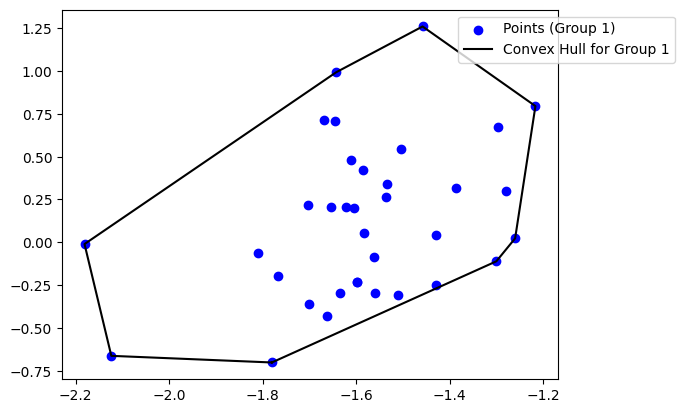

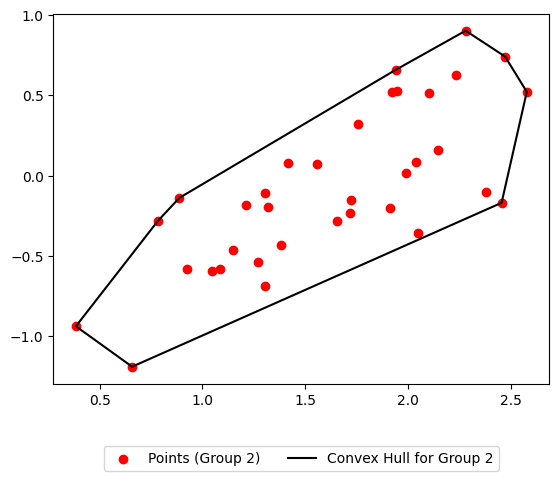

In [426]:
# Encontrando o convex hull para cada grupo
convex1_hull = graham_scan(group1.train_set)
convex2_hull = graham_scan(group2.train_set)

# Plot pontos grupo 1
group1_x = [point.x for point in convex1_hull] + [convex1_hull[0].x]
group1_y = [point.y for point in convex1_hull] + [convex1_hull[0].y]
plt.scatter(group1_all_points_x, group1_all_points_y, color='b', label='Points (Group 1)')
plt.plot(group1_x, group1_y, color='black', label='Convex Hull for Group 1')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

# Plot pontos grupo 2
group2_x = [point.x for point in convex2_hull] + [convex2_hull[0].x]
group2_y = [point.y for point in convex2_hull] + [convex2_hull[0].y]
plt.scatter(group2_all_points_x, group2_all_points_y, color='r', label='Points (Group 2)')
plt.plot(group2_x, group2_y, color='black', label='Convex Hull for Group 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

In [427]:
# algoritmo de varredura para verificar se as arestas do convex hull de um grupo intersectam as arestas do convex hull do outro grupo
def is_on_segment(p, q, r):
    return (min(p.x, q.x) <= r.x <= max(p.x, q.x) and
            min(p.y, q.y) <= r.y <= max(p.y, q.y))

def do_segments_intersect(p1, q1, p2, q2):
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and is_on_segment(p1, q1, p2):
        return True
    if o2 == 0 and is_on_segment(p1, q1, q2):
        return True
    if o3 == 0 and is_on_segment(p2, q2, p1):
        return True
    if o4 == 0 and is_on_segment(p2, q2, q1):
        return True

    return False

# Verificar a interseção entre as arestas do convex hull dos grupos
intersects = False
number_of_intersections = 0
intersection_segments = []

convex1_hull.append(convex1_hull[0])
convex2_hull.append(convex2_hull[0])

for i in range(len(convex1_hull) - 1):
    for j in range(len(convex2_hull) - 1):
        if do_segments_intersect(convex1_hull[i], convex1_hull[i + 1], convex2_hull[j], convex2_hull[j + 1]):
            intersects = True
            intersection_segments.append((convex1_hull[i], convex1_hull[i + 1], convex2_hull[j], convex2_hull[j + 1]))
            number_of_intersections += 1

if intersects:
    print(f"Os grupos têm {number_of_intersections} interseções nas arestas do convex hull.")
    plt.plot(group1_x, group1_y, color='b', label='Convex Hull for Group 1')
    plt.plot(group2_x, group2_y, color='r', label='Convex Hull for Group 2')
    for inter_segment in intersection_segments:
        x_coords1 = [inter_segment[0].x, inter_segment[1].x]
        y_coords1 = [inter_segment[0].y, inter_segment[1].y]
        x_coords2 = [inter_segment[2].x, inter_segment[3].x]
        y_coords2 = [inter_segment[2].y, inter_segment[3].y]
        plt.plot(x_coords2, y_coords2, color='green')
        plt.plot(x_coords1, y_coords1, color='green')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.show()
else:
    print("Os grupos não têm interseções nas arestas do convex hull.")


Os grupos não têm interseções nas arestas do convex hull.


## Plot do feixo convexo do conjunto dos pontos em um gráfico só

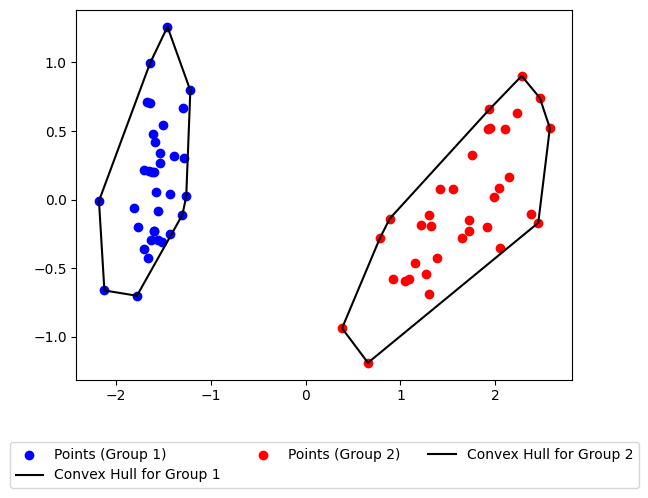

In [428]:
plt.scatter(group1_all_points_x, group1_all_points_y, color='b', label='Points (Group 1)')
plt.plot(group1_x, group1_y, color='black', label='Convex Hull for Group 1')
plt.scatter(group2_all_points_x, group2_all_points_y, color='r', label='Points (Group 2)')
plt.plot(group2_x, group2_y, color='black', label='Convex Hull for Group 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

In [429]:
def distance_squared(point1, point2):
    return (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2

def closest_points(hull_group1, hull_group2):
    min_distance = float('inf')
    closest_points = None

    for point1 in hull_group1:
        for point2 in hull_group2:
            distance = distance_squared([point1.x, point1.y], [point2.x, point2.y])
            if distance < min_distance:
                min_distance = distance
                closest_points = [[point1.x, point1.y], [point2.x, point2.y]]

    return closest_points


Close points
Group1: [-1.3000552472734783, -0.11101032754682194]
Group2: [0.3843369360888962, -0.9390318632322168]


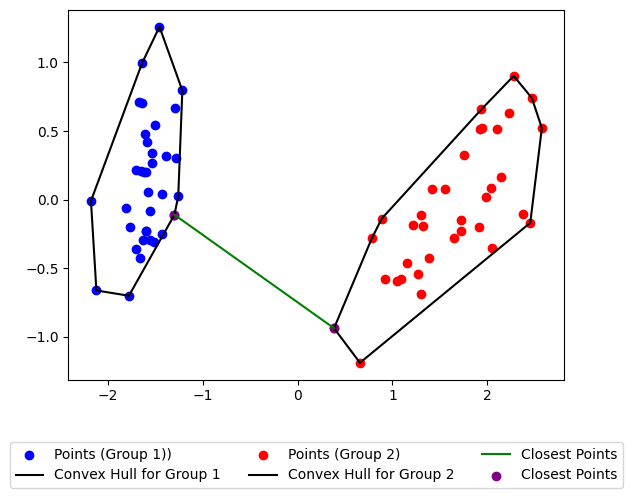

In [430]:
close_points = closest_points(convex1_hull, convex2_hull)
print(f"Close points\nGroup1: {close_points[0]}\nGroup2: {close_points[1]}")
plt.scatter(group1_all_points_x, group1_all_points_y, color='b', label='Points (Group 1))')
plt.plot(group1_x, group1_y, color='black', label='Convex Hull for Group 1')
plt.scatter(group2_all_points_x, group2_all_points_y, color='r', label='Points (Group 2)')
plt.plot(group2_x, group2_y, color='black', label='Convex Hull for Group 2')
plt.plot([close_points[0][0], close_points[1][0]], [close_points[0][1], close_points[1][1]], color='green', label='Closest Points')
plt.scatter([close_points[0][0], close_points[1][0]], [close_points[0][1], close_points[1][1]], color='purple', label='Closest Points')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

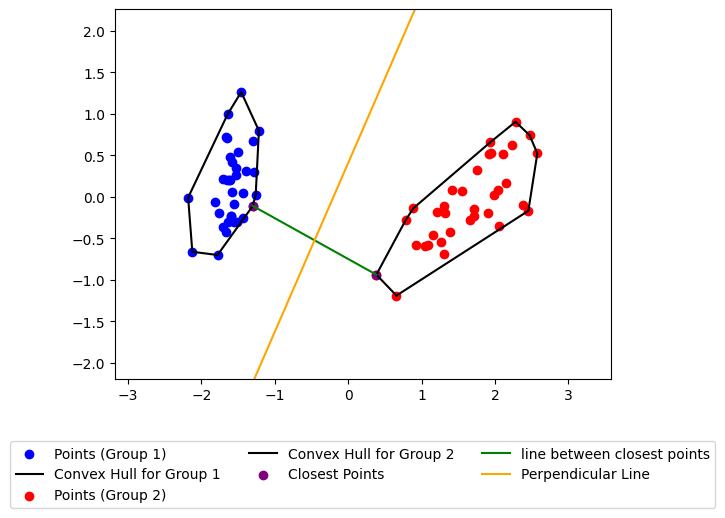

In [431]:
# Criando uma reta perpendicular ao segmento de reta que une os pontos mais próximos
# Calculando a inclinação da reta
slope = (close_points[1][1] - close_points[0][1]) / (close_points[1][0] - close_points[0][0])
# Calculando o ponto médio entre os pontos mais próximos
mid_point = [(close_points[0][0] + close_points[1][0]) / 2, (close_points[0][1] + close_points[1][1]) / 2]
# Calculando o ponto médio entre os pontos mais próximos
perpendicular_slope = -1 / slope
# Calculando o ponto médio entre os pontos mais próximos
perpendicular_mid_point = [mid_point[0], mid_point[1]]
# Calculando os pontos extremos da reta perpendicular
perpendicular_point1 = [perpendicular_mid_point[0] + 10, perpendicular_mid_point[1] + 10 * perpendicular_slope]
perpendicular_point2 = [perpendicular_mid_point[0] - 10, perpendicular_mid_point[1] - 10 * perpendicular_slope]
# Plotando os pontos, mas agora com a reta perpendicular e limitando o gráfico para nao diminuir a qualidade da visualização
# O limite sera um pouco maior que o x mais a direita e o x mais a esquerda
# O limite sera um pouco maior que o y mais a cima e o y mais a baixo
plt.scatter(group1_all_points_x, group1_all_points_y, color='b', label='Points (Group 1)')
plt.plot(group1_x, group1_y, color='black', label='Convex Hull for Group 1')
plt.scatter(group2_all_points_x, group2_all_points_y, color='r', label='Points (Group 2)')
plt.plot(group2_x, group2_y, color='black', label='Convex Hull for Group 2')
plt.scatter([close_points[0][0], close_points[1][0]], [close_points[0][1], close_points[1][1]], color='purple', label='Closest Points')
plt.plot([close_points[0][0], close_points[1][0]], [close_points[0][1], close_points[1][1]], color='green', label='line between closest points')
plt.plot([perpendicular_point1[0], perpendicular_point2[0]], [perpendicular_point1[1], perpendicular_point2[1]], color='orange', label='Perpendicular Line')
plt.xlim([min(group1_all_points_x + group2_all_points_x) - 1, max(group1_all_points_x + group2_all_points_x) + 1])
plt.ylim([min(group1_all_points_y + group2_all_points_y) - 1, max(group1_all_points_y + group2_all_points_y) + 1])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

Acertos: 30
Erros: 0
Precision: 1.0


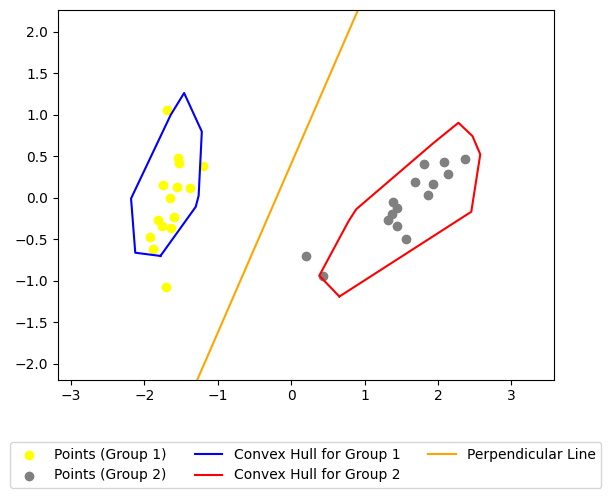

In [432]:
from sklearn.metrics import precision_score

group1_test_x = []
group1_test_y = []
group2_test_x = []
group2_test_y = []

acertos = 0
erros = 0
group = 0



for point in group1.test_set:
    if distance_squared((point.x, point.y), close_points[0]) < distance_squared((point.x, point.y), close_points[1]):
        group1_test_x.append(point.x)
        group1_test_y.append(point.y)
        acertos += 1
    else:
        group2_test_x.append(point.x)
        group2_test_y.append(point.y)
        restante_pontos.append((point, class_values_list[1]))
        erros += 1

for point in group2.test_set:
    if distance_squared((point.x, point.y), close_points[0]) < distance_squared((point.x, point.y), close_points[1]):
        group1_test_x.append(point.x)
        group1_test_y.append(point.y)
        erros += 1
    else:
        group2_test_x.append(point.x)
        group2_test_y.append(point.y)
        restante_pontos.append((point, class_values_list[1]))
        acertos += 1

y_true = [0] * len(group1_test_x) + [1] * len(group2_test_x)
y_pred = [0] * len(group1_test_y) + [1] * len(group2_test_y)

print(f"Acertos: {acertos}")
print(f"Erros: {erros}")
print(f"Precision: {precision_score(y_true, y_pred)}")

# plotando os pontos de teste
plt.scatter(group1_test_x, group1_test_y, color='yellow', label='Points (Group 1)')
plt.scatter(group2_test_x, group2_test_y, color='gray', label='Points (Group 2)')
plt.plot(group1_x, group1_y, color='b', label='Convex Hull for Group 1')
plt.plot(group2_x, group2_y, color='r', label='Convex Hull for Group 2')
plt.plot([perpendicular_point1[0], perpendicular_point2[0]], [perpendicular_point1[1], perpendicular_point2[1]], color='orange', label='Perpendicular Line')
plt.xlim([min(group1_all_points_x + group2_all_points_x) - 1, max(group1_all_points_x + group2_all_points_x) + 1])
plt.ylim([min(group1_all_points_y + group2_all_points_y) - 1, max(group1_all_points_y + group2_all_points_y) + 1])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()